Demo Python codes Brunton & Kutz see: https://github.com/dynamicslab/databook_python

In [2]:
import numpy as np
#from numpy import linalg as LA
import math as m
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio


### Problem 1
Create a random matrix $X$ of size $n \times m$. 

a) For $m=3$ and $n=5$ conduct the singular value decomposition and check that you re-obtain $X=U \, \Sigma \, V^*$. What are the sizes of $U$, $S$ and $V$?  

b) Assume $m=3$, vary $1<n<10$ and compute the number of singular values

c) Conduct the economy SVD on a random matrix $X$ of size $8 \times 4$.  Check that you re-obtain $X$ from $\hat{U} \, \hat{\Sigma} \, V^*$. What sizes are $\hat{U}$, $\hat{\Sigma}$, $V$? 

In [ ]:
# a) DONE

n = 5
m = 3

X = np.random.rand(n,m)
print(f'X = {X}\n\n')

U, S, Vt = np.linalg.svd(X, full_matrices=True)

S_matrix = np.zeros((n,m))
S_matrix[:m,:m] = np.diag(S)

print(f'U = {U}\n\n S_matrix = {S_matrix}\n\n Vt = {Vt}\n\n')
print(f'X = U*E*V = {U@S_matrix@Vt}')

X = [[0.00683775 0.62278657 0.50560608]
 [0.31442329 0.58071835 0.79847908]
 [0.85164827 0.55900808 0.23426429]
 [0.63128817 0.53603059 0.59745502]
 [0.18601607 0.64428857 0.85989668]]


U = [[-0.34423405  0.38105498  0.78649068  0.28455216 -0.19173548]
 [-0.48628509  0.21809433 -0.34646826 -0.37672565 -0.67379464]
 [-0.41376148 -0.75211046  0.34014789 -0.37348886  0.08908857]
 [-0.47519703 -0.27280436 -0.34872967  0.76031207  0.0088734 ]
 [-0.49801501  0.40882711 -0.15517468 -0.24400712  0.70797089]]

 S_matrix = [[2.09541734 0.         0.        ]
 [0.         0.76836248 0.        ]
 [0.         0.         0.24631273]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]

 Vt = [[-0.42963158 -0.6221484  -0.65448306]
 [-0.86615867  0.0790026   0.49348531]
 [-0.25531523  0.77890304 -0.57282125]]


X = U*E*V = [[0.00683775 0.62278657 0.50560608]
 [0.31442329 0.58071835 0.79847908]
 [0.85164827 0.55900808 0.23426429]
 [0.63128817 0.53603059 0.59745502]
 [0.18601607 0.6

In [ ]:
# b) DONE

len_count = []
n_count = []
for n in range(1,11):
    X = np.random.rand(n,m)

    U, S, Vt = np.linalg.svd(X,full_matrices=True)

    len_count.append(len(S))
    n_count.append(n)


for i,val in enumerate(n_count):
    print(f'n = {val} => S size = {len_count[i]}')

n = 1 => S size = 1
n = 2 => S size = 2
n = 3 => S size = 3
n = 4 => S size = 3
n = 5 => S size = 3
n = 6 => S size = 3
n = 7 => S size = 3
n = 8 => S size = 3
n = 9 => S size = 3
n = 10 => S size = 3


In [3]:
# c) DONE

n = 8
m = 4

X = np.random.rand(n,m)
print(f'X = \n {X}')

U_e, S_e, Vt_e = np.linalg.svd(X, full_matrices=False)

S_mat = np.diag(S_e)

# print(f'U_e =\n {U_e}\n\n S_mat =\n {S_mat}\n\n Vt_t =\n {Vt_e}')
# print(U_e.shape, S_mat.shape, Vt_e.shape)

print(f'X = \n {U_e @ S_mat @ Vt_e}')

X = 
 [[0.17522536 0.66115761 0.45424347 0.41190964]
 [0.59495829 0.7766765  0.99988434 0.57965565]
 [0.83049876 0.94278995 0.05406047 0.04269812]
 [0.70047899 0.95016147 0.95766356 0.23920487]
 [0.45772798 0.31378753 0.45854567 0.53271214]
 [0.80060431 0.90183723 0.38063691 0.13922538]
 [0.18722843 0.90260689 0.62402832 0.38777593]
 [0.61656216 0.79303787 0.83619537 0.57259046]]
X = 
 [[0.17522536 0.66115761 0.45424347 0.41190964]
 [0.59495829 0.7766765  0.99988434 0.57965565]
 [0.83049876 0.94278995 0.05406047 0.04269812]
 [0.70047899 0.95016147 0.95766356 0.23920487]
 [0.45772798 0.31378753 0.45854567 0.53271214]
 [0.80060431 0.90183723 0.38063691 0.13922538]
 [0.18722843 0.90260689 0.62402832 0.38777593]
 [0.61656216 0.79303787 0.83619537 0.57259046]]


### Problem 2

For a linear elastic Euler-Bernoulli beam model the solution to the deflection has been found to be 
$$
w(x)=\frac{q_{0} x^{2} \cdot \left(10 L^{2} \cdot \left(2 L - x\right) + x^{3}\right)}{120 E I L}
$$ 
Assume the numerical values $E=210\cdot10^3$ MPa, $I$=,   $L$=1000 mm, $I=20^4/12$ mm$^4$. 

a) Compute five "snapshots" of $w(x)$, by assuming $q_0=1, 2, 3, 8, 9$ N/mm,  to define the data set $\boldsymbol X$. Plot these snapshots. 

b) Compute Pearson's correlation coefficients for the snapshots (see Wikipedia). 

c) Analyse the data set by using the economy SVD. In particular, give the singular values and plot the columns of $\hat{\boldsymbol{U}}$ vs $x$. What column of $\hat{\boldsymbol{U}}$ captures the shape of $w(x)$? 

d) Compute Pearson's correlation coefficients for one of the snapshots vs the columns of $\hat{\boldsymbol{U}}$.

  

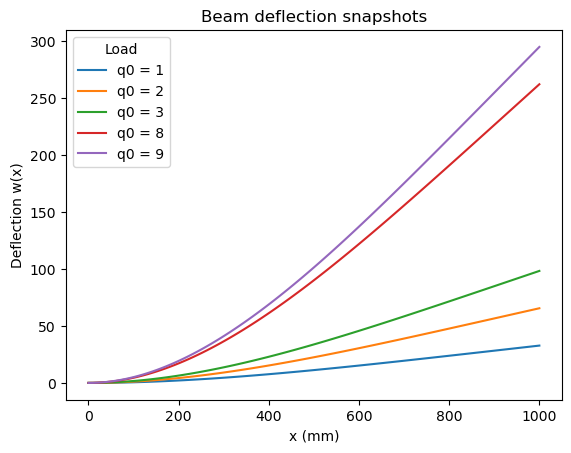

In [7]:
# a)

E = 210e3       # [MPa]
L = 1000        # [mm]
I = (20**4)/12  # [mm^4]
x_vals = np.linspace(0,L,100)
q_vals = np.array([1, 2, 3, 8, 9])

def w(x,q0):
    return (q0*x**2 * (10*L**2 * (2*L - x) + x**3)) / (120*E*I*L)


X = w(x_vals[:, None], q_vals[None, :])

for plot_val in range(5):
    plt.plot(x_vals, X[:,plot_val], label=f'q0 = {q_vals[plot_val]}')

plt.xlabel("x (mm)")
plt.ylabel("Deflection w(x)")
plt.title("Beam deflection snapshots")
plt.legend(title="Load")
plt.show()



In [ ]:
# b)
# Run cell above for X

rho = np.zeros(4)
for i in range(4):
    cov = np.cov(X[:,i],X[:,i+1])[0,1]
    denom = np.std(X[:,i]*X[:,i+1])
    
    rho[i] = cov/denom

print(rho)
    
    


[0.33728573 0.33728573 0.33728573 0.33728573]


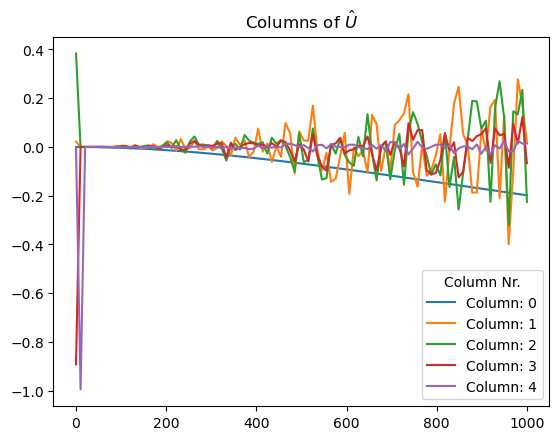

In [ ]:
# c)

U,S,Vt = np.linalg.svd(X, full_matrices=False) # Econ SVd

# Plot columns of econ U vs x and w(x)

for i in range(U.shape[1]):
    plt.plot(x_vals, U[:,i], label=f'Column: {i}')

plt.show
plt.title(r'Columns of $\hat{U}$')
plt.legend(title='Column Nr.')

# The first column seems to capture the shape except negative

In [ ]:
# d) No!

### Problem 3
Using code snippet "Code 2.5" in Brunton-Kutz gives the result in heat_equation_result.mat. This is the solution of the one-dimensional transient heat transfer equation $d \theta/dt=\alpha^2 \theta_{xx}$ with the described initial conditions. In the file you find snapshots in time of the temperature field $\theta(x,t)$ in the matrix $\bm X$. 

* Plot tempoerature field at $t=0$ and $t=10$ s.
* Use truncated SVD to approximate the dataset $\bm{X}$. 
* Plot the singular values of $\hat{\bm{S}}$.
* Plot the columns in $\hat{\bm{U}}$ that indicates the spatial pattern of the SVD modes and the rows in $\hat{\bm{V}}$ that indicates their time pattern. 
* For $t=0$ s and the end time $t=10$ s compare the correct solutions for different truncation values $r$ and present the error distrubution and L2 norm of the errors.

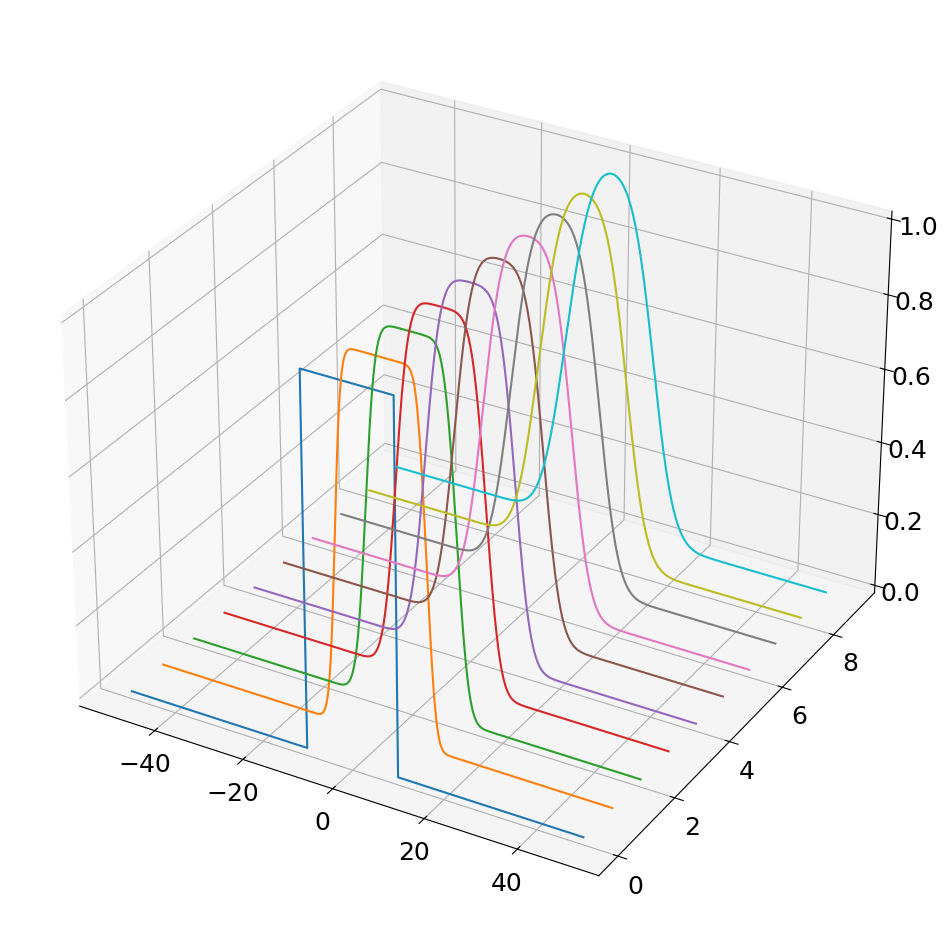

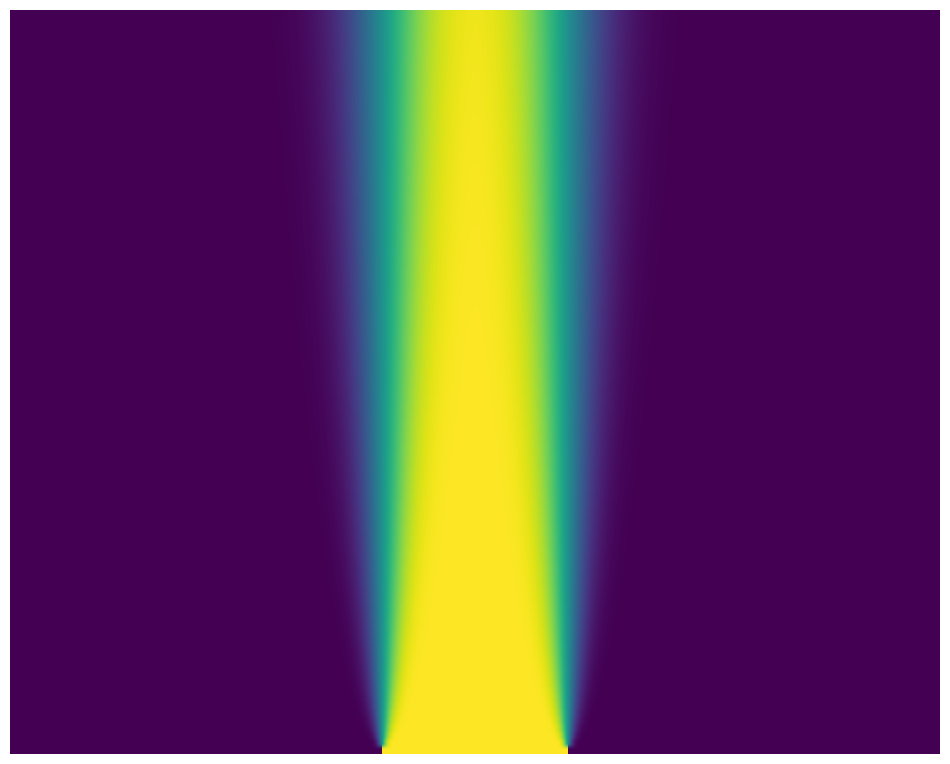

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

a = 1    # Thermal diffusivity constant
L = 100  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0)

# SciPy's odeint function doesn't play well with complex numbers, so we recast 
# the state u0hat from an N-element complex vector to a 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

def rhsHeat(uhat_ri,t,kappa,a):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa,2)) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a))

uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real    

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot (a)?
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

In [ ]:
# I do not know where phi(x,t) or the snapshot matrix X is?!?!?

### Problem 4
Take screen shots from examples of simulations of compressible and incompressible flows on https://g3dflow.com/ . Convert them to greyscale and use SVD to compress the images. Compare your solution to this problem with example in Figure 1.3 and Figure 1.4 in Brunton-Kutz.

* Plot approximative images by using different number of truncation values $r$. 
* For these values present errors and storage compared to your original file. 
* Plot the singular values and their cumulative sum.


### Problem 5 
#### Mass spring system
Study the mass-spring system shown in the figure below 
<div> <img src="spring_system.png" alt="Drawing" style="width: 120px; background-color: white;"/></div>

Assume $k_1=5$ N/mm, $k_2=10$ N/mm, $m_1=1$ kg, $m_2=2$ kg. Neglect gravitational load. Assume the force $F(t)$ given by the function
<pre><code>
def force(t):
    if t<10.:
        value=10.*t
    elif t<50:
        value=10.*10.
    elif t<51:
        value=10.*10.*(51-t)
    else:
        value=100.*m.sin( (t-51.)*2.*m.pi/10.)
    return value
</code></pre>


* Compute and plot the motion $x_1$ and $x_2$ of the masses $0<t<100$ s. Assume that the masses have zero velocity at $t=0$ s.
* Approximate the motion of the masses by using SVD and truncation with  one term. Compare the results in a graph and compute the 2 norm of the errors of $x_1$ and $x_2$.
Approximate the motion of the masses by using SVD and truncation with  two terms. Compute the 2 norm of the errors of $x_1$ and $x_2$.
* Analyse the motion $x_2$ vs $x_1$  for the mass-spring system by performing a Principal Component Analysis (PCA). Compute the principal components for the motion and their directions. Also illustrate the motion in the coordinate system defined by the principal component directions. 



### Problem 6
Creep data from 7 experimental tests for Inconel625 at $650^o$C can be found on creep_data_IN625.mat. The results are given as $\dot \epsilon$ (variable strain_rate)  and $\sigma/E$ (variable stress_divided_by_E) where $E$ is Young's modulus for the material. $E$ can be obtained from Wang et al . Metals 2020, 10, 274; doi:10.3390/met10020274 presented in figure (where $T$ is the temperature) 

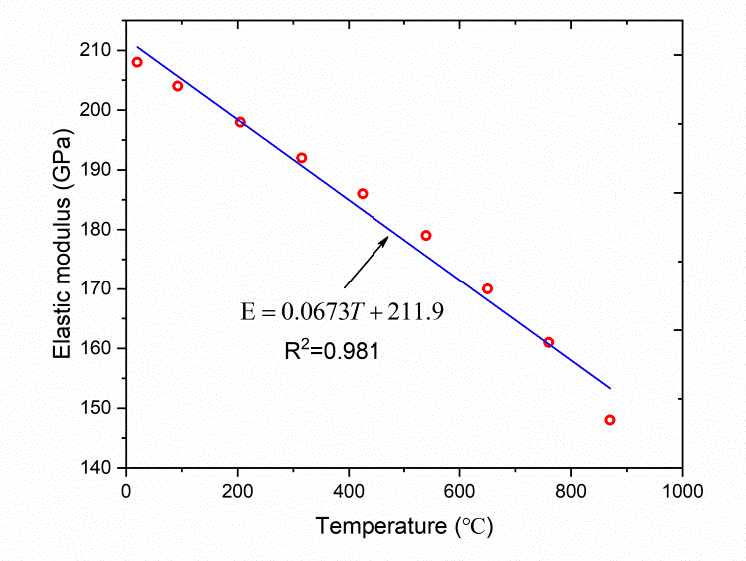



Determine the best fit of the creep model $\dot{\epsilon}=(\sigma/C)^n$ to the experimental data by using SVD, i.e. determine $n$ and $C$.

You can also check the linear regression done in this figure. A convenient way to do this, using the figure above (when not having access to the numbers), is to download and use the free Matlab package grabit. 

## Problem 7 
###  Ovarian cancer example in the book.
Go through the example and the solution code (see https://github.com/dynamicslab/databook_python)